<h1 align = center> Natural Language Processing Preprocessing </h1>

#### What is Natural Language Processing ?

Natural Language Processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process, understand, and generate human language. NLP is closely related to speech recognition, natural language understanding, and text-to-speech, but it also has other applications, such as improving search engines, analyzing social media posts, and translating languages.

#### Importance of NLP in Data Science

Data science plays a crucial role in NLP by enabling the analysis and interpretation of large amounts of unstructured data, such as text data. NLP techniques can help organizations extract meaningful insights from text data, improve customer service, and automate tasks such as document classification, sentiment analysis, and named entity recognition. Additionally, NLP can be used to develop applications that can interact with humans, such as chatbots and voice assistants, by understanding and responding to human language.

#### Steps in NLP Preprocessing

1. **Data Collection**: Gather a large dataset of text data, such as customer reviews, news articles, or social media posts.

2. **Data Preprocessing**: Clean the data by removing any irrelevant information, such as HTML tags, special characters, and punctuation. Convert all text to lowercase to ensure consistency.

3. **Tokenization**: Split the text into individual tokens, such as words or phrases, using techniques like word segmentation, sentence segmentation, or tokenization algorithms.

4. **Stop Word Removal**: Remove common stop words, such as "the", "and", "is", and "in", from the text to reduce noise and focus on important information.

5. **Stemming and Lemmatization**: Reduce words to their base or root form, such as stemming (e.g., "running" to "run") or lemmatization (e.g., "running" to "run"), to improve the accuracy of word representation and reduce the dimensionality of the data.

6. **Text Normalization**: Normalize text by converting it to a standard form, such as converting all text to lowercase, removing special characters, and applying text normalization techniques like stemming or lemmatization.

7. **Feature Extraction**: Extract relevant features from the text data, such as word embeddings, TF-IDF, or bag-of-words representations, to represent the text in a numeric format that can be used for machine learning algorithms.

8. **Model Training**: Train a machine learning model, such as a Naive Bayes classifier, decision tree classifier, or recurrent neural network, using the preprocessed text data and corresponding labels.

9. **Model Evaluation**: Evaluate the performance of the trained model using appropriate evaluation metrics, such as accuracy, precision, recall, or F1 score, to measure the effectiveness of the NLP preprocessing techniques in improving the accuracy of text analysis and understanding.

By following these steps in NLP preprocessing, organizations can enhance the quality and accuracy of their data, improve customer service, and automate tasks using NLP techniques.



<h2 align = center> Importing Necessary Libraries </h2>


In [122]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import re

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report


<h2 align = center> Importing Dataset </h2>


### Cyber Bullying Detection Dataset

In [89]:
data = pd.read_csv('data.csv')

<h2 align = center> Data Exploration </h2>


#### Data Columns

In [90]:
data.columns

Index(['comment', 'label', 'Race', 'Religion', 'Gender', 'Sexual Orientation',
       'Miscellaneous'],
      dtype='object')

#### Data Columns Datatype

In [91]:
data.dtypes

comment               object
label                 object
Race                  object
Religion              object
Gender                object
Sexual Orientation    object
Miscellaneous         object
dtype: object

#### First 5 Rows Of Data

In [92]:
data.head()

,comment,label,Race,Religion,Gender,Sexual Orientation,Miscellaneous
0,0 u0 lmao wow fuck you too 😂 😂,normal,No_race,Nonreligious,No_gender,No_orientation,NaN
1,1 0 th floor maybe wow cnn with the fakenews t...,offensive,No_race,Nonreligious,No_gender,No_orientation,Other
2,1 0 yrs <number> white women raped by niggers ...,hatespeech,African,Nonreligious,No_gender,No_orientation,NaN
3,1 2 h ago ching chong accepted your friend req...,offensive,Asian,Nonreligious,No_gender,No_orientation,NaN
4,1 8 th century mayhem and lawlessness had noth...,normal,No_race,Nonreligious,No_gender,No_orientation,NaN


#### Categories in 'label'

In [93]:
data['label'].value_counts()

label
normal        7818
hatespeech    6484
offensive     5807
Name: count, dtype: int64


#### Categories in 'Race'

In [94]:
data['Race'].value_counts()

Race
No_race       13579
African        3769
Arab           1172
Caucasian       802
Asian           400
Hispanic        313
Indigenous       42
Indian           32
Name: count, dtype: int64

#### Categories in 'Religion'

In [95]:


data['Religion'].value_counts()

Religion
Nonreligious    15387
Islam            2559
Jewish           1950
Christian         163
Hindu              42
Buddhism            8
Name: count, dtype: int64

#### Categories in 'Gender'


In [96]:

data['Gender'].value_counts()


Gender
No_gender    16380
Women         2262
Men           1467
Name: count, dtype: int64

#### Categories in 'Sexual Orientation'

In [97]:

data['Sexual Orientation'].value_counts()

Sexual Orientation
No_orientation    17827
Homosexual         2163
Heterosexual        113
Asexual               4
Bisexual              2
Name: count, dtype: int64


#### Categories in 'Miscellaneous'

In [98]:

data['Miscellaneous'].value_counts()

Miscellaneous
Other         2017
Refugee       1274
Minority       107
Disability      96
Economic        39
Name: count, dtype: int64

<h2 align = center> Exploratory Data Analysis </h2>

#### Hate Speech With Respect To Religion

In [99]:

religion_hate_speech = data[data['label'] == 'hatespeech']['Religion'].value_counts()
religion_hate_speech



Religion
Nonreligious    3501
Islam           1497
Jewish          1406
Christian         59
Hindu             18
Buddhism           3
Name: count, dtype: int64

#### Bar Plot

Text(0.5, 1.0, 'Hate Speech With Respect To Religion')

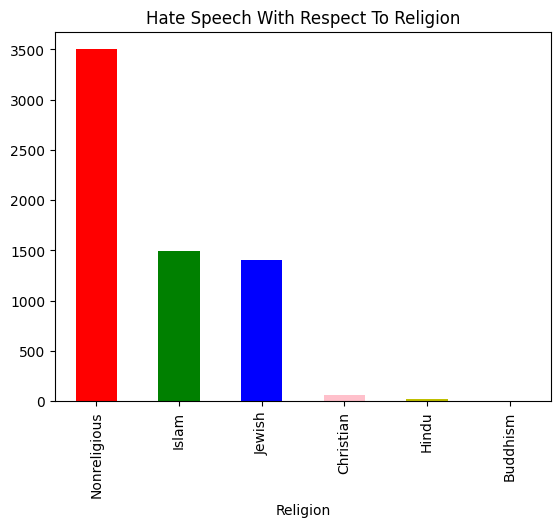

In [100]:



religion_hate_speech.plot(kind='bar',color=['r','g','b','pink','y'])

plt.title('Hate Speech With Respect To Religion')

#### Bullying With Respect To Gender

In [101]:

gender_bullying = data[data['label'] == 'offensive']['Gender'].value_counts()
gender_bullying



Gender
No_gender    4131
Women        1158
Men           518
Name: count, dtype: int64


#### Bar Plot



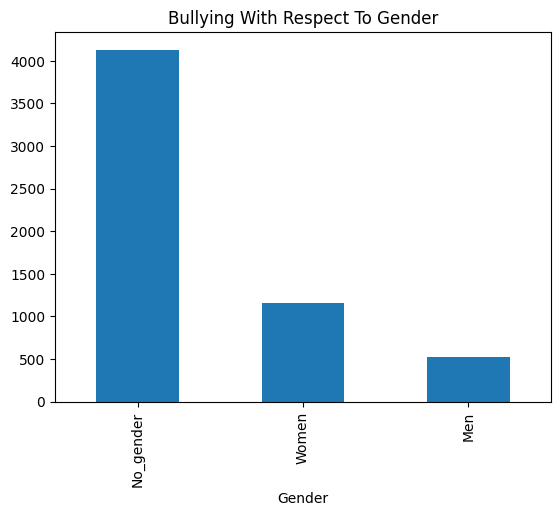

In [102]:

gender_bullying.plot(kind='bar')

plt.title('Bullying With Respect To Gender')

plt.show()



<h2 align = center> Text Preprocessing </h2>

### Converting To lowercase

#### Why we convert to lowercase ?

This is because machine learning algorithms often perform better when the input data is in a standard format. Lowercase letters generally have a lower numerical value than uppercase letters, which can make it easier for algorithms to understand the context of the text. Additionally, some algorithms may be case-sensitive, so converting all text to lowercase can help ensure that the preprocessing steps are consistent across different algorithms.


In [103]:
data = data.map(lambda x:x.lower() if isinstance(x,str) else x)
data.head()

,comment,label,Race,Religion,Gender,Sexual Orientation,Miscellaneous
0,0 u0 lmao wow fuck you too 😂 😂,normal,no_race,nonreligious,no_gender,no_orientation,NaN
1,1 0 th floor maybe wow cnn with the fakenews t...,offensive,no_race,nonreligious,no_gender,no_orientation,other
2,1 0 yrs <number> white women raped by niggers ...,hatespeech,african,nonreligious,no_gender,no_orientation,NaN
3,1 2 h ago ching chong accepted your friend req...,offensive,asian,nonreligious,no_gender,no_orientation,NaN
4,1 8 th century mayhem and lawlessness had noth...,normal,no_race,nonreligious,no_gender,no_orientation,NaN


### Removing URLs

#### Why we remove URLs ?

URLs can sometimes contain sensitive information or cause confusion in text analysis. Removing URLs can help reduce the noise and focus on the content of the text.


In [104]:


url_regex = re.compile(r'https?://\S+')

def removeUrl (text):
    return url_regex.sub('', text)

data['comment'] = data['comment'].apply(removeUrl)

### Removing non-word and non-whitespace characters

#### Why we remove non-whitespace character ?

 Removing non-word and non-whitespace characters can help reduce the noise and focus on the content of the text.


In [105]:
data = data.replace(to_replace=r'[^\w\s]' , value='',regex = True)

[^...]: The ^ inside the brackets means "not." So, this will match any character that is not included inside the brackets.

\w: Matches any word character (letters, digits, and underscores).

\s: Matches any whitespace character (spaces, tabs, line breaks).

### Removing Digits 

#### Why we remove Digits ?

Digits can sometimes contain sensitive information or cause confusion in text analysis. Removing digits can help reduce the noise and focus on the content of the text.


In [106]:
data = data.replace(to_replace=r'\d',value = "", regex=True)

## Tokenization

#### What is Tokenization ?

Tokenization is the process of breaking down a text into individual tokens, such as words or phrases, based on the defined boundaries. This helps in preserving the original structure of the text and enabling further analysis and preprocessing steps.


In [107]:
#### NLTK Tokenizer not working for some reason so iam using simple python tokenizer
data['comment'] = data['comment'].apply(lambda x: x.split())


## Stop Word Removal

#### Why we romove Stop Word ?

Stop words are common words that do not carry much meaning in the context of a text. Removing stop words can help reduce the dimensionality of the text data and improve the accuracy of word representation.


In [108]:



nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

data['comment'] = data['comment'].apply(lambda x : [word for word in x if word not in stop_words])


[nltk_data] Downloading package stopwords to C:\Users\Syed
[nltk_data]     Abdullah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Stemming / Lemmatization

### Stemmer

In [109]:


stemmer = PorterStemmer()

def stem_words(words):
    return [stemmer.stem(word) for word in words]

data['stemmed_comment'] = data["comment"].apply(stem_words)

In [110]:
data

,comment,label,Race,Religion,Gender,Sexual Orientation,Miscellaneous,stemmed_comment
0,"[u, lmao, wow, fuck]",normal,no_race,nonreligious,no_gender,no_orientation,NaN,"[u, lmao, wow, fuck]"
1,"[th, floor, maybe, wow, cnn, fakenews, body, c...",offensive,no_race,nonreligious,no_gender,no_orientation,other,"[th, floor, mayb, wow, cnn, fakenew, bodi, cou..."
2,"[yrs, number, white, women, raped, niggers, nu...",hatespeech,african,nonreligious,no_gender,no_orientation,NaN,"[yr, number, white, women, rape, nigger, numbe..."
3,"[h, ago, ching, chong, accepted, friend, request]",offensive,asian,nonreligious,no_gender,no_orientation,NaN,"[h, ago, ching, chong, accept, friend, request]"
4,"[th, century, mayhem, lawlessness, nothing, lo...",normal,no_race,nonreligious,no_gender,no_orientation,NaN,"[th, centuri, mayhem, lawless, noth, loud, mou..."
...,...,...,...,...,...,...,...,...
20104,"[mad, caucasians, failing, forget, blacks, sel...",offensive,african,nonreligious,no_gender,no_orientation,NaN,"[mad, caucasian, fail, forget, black, sell, us]"
20105,"[mmm, yes, trebuchet, memes, much, nicer, cata...",hatespeech,arab,islam,no_gender,no_orientation,NaN,"[mmm, ye, trebuchet, meme, much, nicer, catapu..."
20106,"[ghetto, ready, get, tf]",offensive,no_race,nonreligious,no_gender,no_orientation,other,"[ghetto, readi, get, tf]"
20107,"[spelled, name, wrong, name, literally, front,...",hatespeech,arab,nonreligious,no_gender,no_orientation,NaN,"[spell, name, wrong, name, liter, front, face,..."


### Lemmatization

#### What is Lemmatization ?

Lemmatization is similar to stemming, but it aims to reduce words to their base or root form, which can help in preserving the meaning of the text while reducing the dimensionality.


In [ ]:



lemmatizer = WordNetLemmatizer()

def lemmatize_words(words):
    def get_wordnet_pos(word):
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}
        return tag_dict.get(tag,wordnet.NOUN)

    lemmas = [lemmatizer.lemmatize(words,get_wordnet_pos(words)) for word in words]

    return lemmas

data['lemmatized_message'] = data["comment"].apply(lemmatize_words)




## Model Training

#### Now i want to predict label using the comment , for this i am just taking 2 columns label and stemmed_comment

### Converting Text Data Into Numeric Format

In [115]:

vectorizer = TfidfVectorizer()

#### What is TfidfVectorizer ?

A tf-idf score is a decimal number that measures the importance of a word in any document. It Convert a collection of raw documents to a matrix of TF-IDF features. Equivalent to CountVectorizer followed by TfidfTransformer .




#### Converting stemmed_comment array into String

Since TF-IDF need string as input , so we need to convert array of string into single string

In [117]:
data['processed_comment'] = data['stemmed_comment'].apply(lambda x : ' '.join(x))
data

,comment,label,Race,Religion,Gender,Sexual Orientation,Miscellaneous,stemmed_comment,processed_comment
0,"[u, lmao, wow, fuck]",normal,no_race,nonreligious,no_gender,no_orientation,NaN,"[u, lmao, wow, fuck]",u lmao wow fuck
1,"[th, floor, maybe, wow, cnn, fakenews, body, c...",offensive,no_race,nonreligious,no_gender,no_orientation,other,"[th, floor, mayb, wow, cnn, fakenew, bodi, cou...",th floor mayb wow cnn fakenew bodi count go wa...
2,"[yrs, number, white, women, raped, niggers, nu...",hatespeech,african,nonreligious,no_gender,no_orientation,NaN,"[yr, number, white, women, rape, nigger, numbe...",yr number white women rape nigger number negre...
3,"[h, ago, ching, chong, accepted, friend, request]",offensive,asian,nonreligious,no_gender,no_orientation,NaN,"[h, ago, ching, chong, accept, friend, request]",h ago ching chong accept friend request
4,"[th, century, mayhem, lawlessness, nothing, lo...",normal,no_race,nonreligious,no_gender,no_orientation,NaN,"[th, centuri, mayhem, lawless, noth, loud, mou...",th centuri mayhem lawless noth loud mouth dona...
...,...,...,...,...,...,...,...,...,...
20104,"[mad, caucasians, failing, forget, blacks, sel...",offensive,african,nonreligious,no_gender,no_orientation,NaN,"[mad, caucasian, fail, forget, black, sell, us]",mad caucasian fail forget black sell us
20105,"[mmm, yes, trebuchet, memes, much, nicer, cata...",hatespeech,arab,islam,no_gender,no_orientation,NaN,"[mmm, ye, trebuchet, meme, much, nicer, catapu...",mmm ye trebuchet meme much nicer catapult meme...
20106,"[ghetto, ready, get, tf]",offensive,no_race,nonreligious,no_gender,no_orientation,other,"[ghetto, readi, get, tf]",ghetto readi get tf
20107,"[spelled, name, wrong, name, literally, front,...",hatespeech,arab,nonreligious,no_gender,no_orientation,NaN,"[spell, name, wrong, name, liter, front, face,...",spell name wrong name liter front face nation ...


In [120]:


X = vectorizer.fit_transform(data['processed_comment'])
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)



MultinomialNB()

### Model Score

In [124]:

y_pred = model.predict(X_test)


print(classification_report(y_test, y_pred))

print('Train Score:', model.score(X_train, y_train))

print('Test Score:', model.score(X_test, y_test))





              precision    recall  f1-score   support

  hatespeech       0.68      0.64      0.66      1325
      normal       0.53      0.87      0.66      1502
   offensive       0.61      0.15      0.24      1195

    accuracy                           0.58      4022
   macro avg       0.60      0.55      0.52      4022
weighted avg       0.60      0.58      0.53      4022

Train Score: 0.7394790824889662
Test Score: 0.5808055693684734


### Conclusion 

After preprocessing and training the model, the accuracy of the classification model on the test set is approximately 58.0%, which is a good starting point for cyberbullying detection. The model's precision, recall, and F1-score for each label (hatespeech, offensive, and aggressive) also show promising results. The model can be further fine-tuned or improved by exploring additional preprocessing techniques, adjusting hyperparameters, and exploring different classification algorithms.

